In [11]:
import pandas as pd
import LabIFSC2 as lab
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

## Carrega dados e define constantes

In [12]:
ar_file_path = './dados_bons/ar_lente_boa/dados.txt'
vidro_file_path = './dados_bons/vidro_lente_boa/dados.txt'
nu = lab.Medida(60, 'MHz', 0)

def get_data(path: str)->tuple[np.ndarray, np.ndarray]:
    data = pd.read_csv(path, sep=',')
    distancia=np.array([lab.Medida(100.0 - d_metal + 12.7,"cm",0) for d_metal in data["d_metal"]])
    fases=np.array([lab.Medida(phi,"degrees",0) for phi in data["fase"]])
    return np.abs((distancia-distancia[0])), np.abs((fases-fases[0]))

## Grafico

In [13]:
def criar_grafico(distancias:np.ndarray, fase:np.ndarray,meio:str) -> tuple[plt.Figure,plt.Axes]:
    unidade_distancia="cm"
    unidade_fase="degrees"

    plt.style.use("ggplot")
    fig, ax = plt.subplots()
    (a),popt=curve_fit(lambda x,a: a*x,lab.nominais(distancias,unidade_distancia),lab.nominais(fase,unidade_fase))
    a=lab.Medida(a[0],f"{unidade_fase}/{unidade_distancia}",np.sqrt(popt[0][0]))
    ax.scatter(lab.nominais(distancias, unidade_distancia), 
                lab.nominais(fase, unidade_fase),
                label='Dados experimentais',color="blue")
    ax.plot(lab.nominais(distancias, unidade_distancia), 
            lab.nominais(a*distancias,unidade_fase), 
            color='red', label='Ajuste linear')
    ax.set_xlabel(fr"$\Delta S$ ({unidade_distancia})")
    ax.set_ylabel(fr"$\Delta \phi$ ({unidade_fase})")
    ax.legend()
    c=(2 * lab.constantes.pi * nu)/a
    ax.set_title(f"Velocidade da luz no {meio} {c:km/s}")
    return fig,ax

## Velocidade da luz no Ar

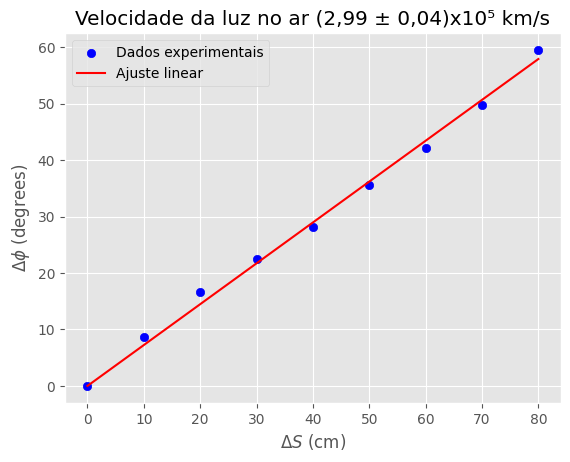

In [14]:
distancias_ar,fase_ar = get_data(ar_file_path)
fig,axis=criar_grafico(distancias_ar, fase_ar,"ar")
fig.savefig("velocidade_ar.png",dpi=300)